# Test xgboost model

In [8]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

In [9]:
import xarray as xr
import copy
import matplotlib.pyplot as plt
import src.models.xgb as xgb

In [11]:
xr.__version__

'0.17.0'

In [12]:
y_ds = xr.open_dataset("/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/inputs/take_esa_coords_False_use_mfd_True_use_ffil_True_use_ir_False_y.nc")

In [14]:
y_ds.esa_cci

<xarray.DataArray 'esa_cci' (year: 24, y: 7009, x: 11184)>
[1881327744 values with dtype=uint8]
Coordinates:
  * x        (x) float64 28.41 28.41 28.41 28.41 ... 31.42 31.42 31.42 31.42
  * y        (y) float64 52.43 52.43 52.43 52.43 ... 50.55 50.55 50.55 50.55
    band     int64 1
  * year     (year) int64 1992 1993 1994 1995 1996 ... 2011 2012 2013 2014 2015
Attributes:
    transform:      [ 2.77777778e-03  0.00000000e+00  2.84055556e+01  0.00000...
    crs:            +init=epsg:4326
    res:            [0.00277778 0.00277778]
    is_tiled:       0
    nodatavals:     0.0
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area

In [39]:
from src.preprocessing.load_landsat_esa import return_xy_npa, y_npa_to_xr, x_npa_to_xr, return_x_y_da

cfd = {
        "start_year_i": 14,
        "mid_year_i": 19,
        "end_year_i": 21,
        "take_esa_coords": False,
        "use_ffil": True,
        "use_mfd": False,
        "use_ir": False
    }

In [31]:
x_da, y_da = return_x_y_da(
        take_esa_coords=cfd["take_esa_coords"],
        use_ffil=cfd["use_ffil"],
        use_mfd=cfd["use_mfd"],
        prefer_remake=False,
    )

['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/inputs/take_esa_coords_False_use_mfd_False_use_ffil_True_use_ir_False_x.nc', '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/inputs/take_esa_coords_False_use_mfd_False_use_ffil_True_use_ir_False_y.nc']
x/y values premade. Reusing them.
clipping
before clipping, da_1 <xarray.Dataset>
Dimensions:    (band: 3, mn: 4, x: 11905, y: 7361, year: 24)
Coordinates:
  * x          (x) float64 28.27 28.27 28.27 28.27 ... 31.47 31.47 31.47 31.47
  * y          (y) float64 52.48 52.48 52.48 52.48 52.48 ... 50.5 50.5 50.5 50.5
  * band       (band) object 'A' 'B' 'C'
  * year       (year) int64 1992 1993 1994 1995 1996 ... 2012 2013 2014 2015
  * mn         (mn) object 'JFM' 'AMJ' 'JAS' 'OND'
Data variables:
    norm_refl  (y, x, band, year, mn) float32 ...
after clipping, da_2 <xarray.Dataset>
Dimensions:  (x: 11184, y: 7009, year: 24)
Coordinates:
  * x        (x) float64 28.41 28.41 28.

In [24]:
from src.preprocessing.load_landsat_esa import return_xy_np_grid

x, y = return_xy_np_grid(x_da, y_da, year=range(0, 5))

'return_xy_np_grid'  12.11578 s



In [32]:
x_da

<xarray.DataArray 'norm_refl' (y: 7009, x: 11184, band: 3, year: 24, mn: 4)>
[22575932928 values with dtype=float32]
Coordinates:
  * x        (x) float64 28.41 28.41 28.41 28.41 ... 31.42 31.42 31.42 31.42
  * y        (y) float64 52.43 52.43 52.43 52.43 ... 50.55 50.55 50.55 50.55
  * band     (band) object 'A' 'B' 'C'
  * year     (year) int64 1992 1993 1994 1995 1996 ... 2011 2012 2013 2014 2015
  * mn       (mn) object 'JFM' 'AMJ' 'JAS' 'OND'
Attributes:
    description:  Normalized reflectance at chernfor JFM. Bands order ['B3', ...
    bands:        ['B3', 'B2', 'B1']

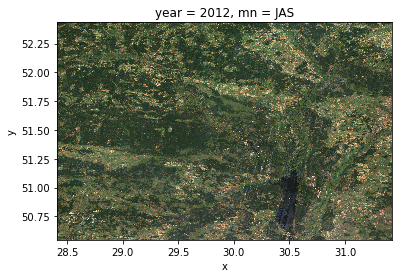

In [38]:
x_da.isel(year=20, mn=2).plot.imshow()

In [33]:
y_da

<xarray.DataArray 'esa_cci' (year: 24, y: 7009, x: 11184)>
[1881327744 values with dtype=uint8]
Coordinates:
  * x        (x) float64 28.41 28.41 28.41 28.41 ... 31.42 31.42 31.42 31.42
  * y        (y) float64 52.43 52.43 52.43 52.43 ... 50.55 50.55 50.55 50.55
    band     int64 ...
  * year     (year) int64 1992 1993 1994 1995 1996 ... 2011 2012 2013 2014 2015
Attributes:
    transform:      [ 2.77777778e-03  0.00000000e+00  2.84055556e+01  0.00000...
    crs:            +init=epsg:4326
    res:            [0.00277778 0.00277778]
    is_tiled:       0
    nodatavals:     0.0
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area

In [25]:
print(x.shape)
print(y.shape)
# yr, x, y, band

(5, 681, 1086, 12)
(5, 681, 1086)


In [30]:
y_npa_to_xr(y, y_da.isel(year=range(0, 5)), reshape=False)

'y_npa_to_xr'  0.00062 s



<xarray.DataArray (year: 5, y: 681, x: 1086)>
array([[[  0, 100, 100, ...,  40,  40,   0],
        [  0,  60,  60, ...,  60,  40,   0],
        [  0,  90,  90, ...,  40,  40,   0],
        ...,
        [  0,  10,  10, ...,  60,  60,   0],
        [  0,  10,  70, ...,  40,  40,   0],
        [  0,  70,  70, ...,  40,  40,   0]],

       [[  0, 100, 100, ...,  40,  40,   0],
        [  0,  60,  60, ...,  60,  40,   0],
        [  0,  90,  90, ...,  40,  40,   0],
        ...,
        [  0,  10,  10, ...,  60,  60,   0],
        [  0,  10,  70, ...,  40,  40,   0],
        [  0,  70,  70, ...,  40,  40,   0]],

       [[  0, 100, 100, ...,  40,  40,   0],
        [  0,  60,  60, ...,  60,  40,   0],
        [  0,  90,  90, ...,  40,  40,   0],
        ...,
        [  0,  10,  10, ...,  60,  60,   0],
        [  0,  10,  70, ...,  40,  40,   0],
        [  0,  70,  70, ...,  40,  40,   0]],

       [[  0, 100, 100, ...,  40,  40,   0],
        [  0,  60,  60, ...,  60,  40,   0],
        [  0,  90,  90, ...,  40,  40,   0],
        ...,
        [  0,  10,  10, ...,  60,  60,   0],
        [  0,  10,  70, ...,  40,  40,   0],
        [  0,  70,  70, ...,  40,  40,   0]],

       [[  0, 100, 100, ...,  40,  40,   0],
        [  0,  60,  60, ...,  60,  40,   0],
        [  0,  90,  90, ...,  40,  40,   0],
        ...,
        [  0,  10,  10, ...,  60,  60,   0],
        [  0,  10,  70, ...,  40,  40,   0],
        [  0,  70,  70, ...,  40,  40,   0]]], dtype=uint8)
Coordinates:
  * x        (x) float64 28.41 28.41 28.41 28.42 ... 31.41 31.42 31.42 31.42
  * y        (y) float64 52.43 52.43 52.43 52.43 ... 50.55 50.55 50.55 50.55
  * year     (year) int64 1992 1993 1994 1995 1996

In [42]:
print(x1.shape)
print(y1.shape)

(78388656, 12)
(78388656,)


In [40]:
from src.preprocessing.load_landsat_esa import return_xy_npa
x1, y1 = return_xy_npa(x_da, y_da, year=5)
print(x1.shape)
print(y1.shape)

'return_xy_npa'  228.71744 s

(78388656, 12)
(78388656,)


In [4]:
xr.open_dataset("/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/"
                + "gee_satellite_data/tmp_nc/chern_JFM_year_2020.nc")

<xarray.Dataset>
Dimensions:    (band: 3, mn: 1, x: 11905, y: 7361, year: 1)
Coordinates:
  * y          (y) float64 52.48 52.48 52.48 52.48 52.48 ... 50.5 50.5 50.5 50.5
  * x          (x) float64 28.27 28.27 28.27 28.27 ... 31.47 31.47 31.47 31.47
  * band       (band) object 'red' 'green' 'blue'
  * year       (year) int64 2020
  * mn         (mn) object 'JFM'
Data variables:
    norm_refl  (y, x, band, year, mn) float32 ...

In [40]:
from src.preprocessing.landsat import return_path_dataarray, load_rgb_data

In [42]:
load_rgb_data().shape

'return_normalized_array'  20.03432 s



(7361, 11905, 3)

In [102]:
l = ['a', 'b', 'c']
l.reverse()
print(l)

['c', 'b', 'a']


In [ ]:
/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/tmp_nc

In [69]:
ls /gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/nc_chern

chern_AMJ.nc  chern_JAS.nc  chern_JFM.nc  chern_OND.nc


In [70]:
a = "/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/nc_chern/chern_JFM.nc"

In [73]:
xr.open_dataset(a).norm_refl.attrs

{'description': 'Normalized reflectance at chern.'}

In [44]:
import rasterio
rast = rasterio.open(path)

In [78]:
np.dstack(([[0, 0], [0, 0]], [[1, 1], [1, 1]], [[3, 3], [3, 3]]))

array([[[0, 1, 3],
        [0, 1, 3]],

       [[0, 1, 3],
        [0, 1, 3]]])

In [79]:
import matplotlib.pyplot as plt

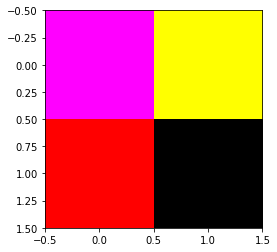

In [103]:
plt.imshow(np.dstack(([[2, 2], [2, 0]], [[0, 2], [0, 0]], [[2, 0], [0, 0]])) / 2)

In [49]:
dir(rast)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_block_shapes',
 '_closed',
 '_count',
 '_crs',
 '_crs_wkt',
 '_descriptions',
 '_dtypes',
 '_env',
 '_gcps',
 '_get_crs',
 '_get_rpcs',
 '_handle_crswkt',
 '_has_band',
 '_has_gcps_or_rpcs',
 '_mask_flags',
 '_nodatavals',
 '_offsets',
 '_read',
 '_rpcs',
 '_scales',
 '_set_all_descriptions',
 '_set_all_offsets',
 '_set_all_scales',
 '_set_all_units',
 '_set_attrs_from_dataset_handle',
 '_set_crs',
 '_set_gcps',
 '_set_nodatavals',
 '_set_rpcs',
 '_transform',
 '_units',
 'block_shapes',
 'block_size',
 'block_window',
 'block_windows',
 'bounds',
 'checksum

In [58]:
rast.descriptions

('B5', 'B6', 'B7')

In [24]:
return_path_dataarray()

'return_path_dataarray'  0.06497 s



<xarray.DataArray (year: 37, mn: 4, ty: 2, ir: 2)>
array([[[[None, None],
         [None, None]],

        [['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_hab_1984_AMJ.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_hab_1984_AMJ_IR.tif'],
         ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_chern_1984_AMJ.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_chern_1984_AMJ_IR.tif']],

        [['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_hab_1984_JAS.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_hab_1984_JAS_IR.tif'],
         ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_chern_1984_JAS.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_chern_1984_JAS_IR.tif']],

        [['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_hab_1984_OND.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_hab_1984_OND_IR.tif'],
         ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_chern_1984_OND.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1984/L5_chern_1984_OND_IR.tif']]],


       [[['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1985/L5_hab_1985_JFM.tif',
...
       [[['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_JFM.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_JFM_IR.tif'],
         ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_JFM.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_JFM_IR.tif']],

        [['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_AMJ.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_AMJ_IR.tif'],
         ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_AMJ.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_AMJ_IR.tif']],

        [['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_JAS.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_JAS_IR.tif'],
         ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_JAS.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_JAS_IR.tif']],

        [['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_OND.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_OND_IR.tif'],
         ['/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_OND.tif',
          '/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_chern_2020_OND_IR.tif']]]],
      dtype=object)
Coordinates:
  * year     (year) int64 1984 1985 1986 1987 1988 ... 2016 2017 2018 2019 2020
  * mn       (mn) <U3 'JFM' 'AMJ' 'JAS' 'OND'
  * ty       (ty) <U5 'hab' 'chern'
Dimensions without coordinates: ir
Attributes:
    description:  Paths to tif.

In [28]:
file_name = return_path_dataarray().isel(year=1, mn=0, ty=1, ir=0).values.tolist()

'return_path_dataarray'  0.05338 s



In [15]:
file_name_two = return_path_dataarray().isel(year=1, mn=0, ty=1).values.tolist()

'return_path_dataarray'  0.05737 s



In [29]:
file_name

'/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1985/L5_chern_1985_JFM.tif'

In [118]:
xr.open_rasterio(return_path_dataarray().isel(year=1, mn=0, ty=1, ir=0).values.tolist()).attrs['descriptions'][1:2]

'return_path_dataarray'  0.02361 s



('B2',)

In [33]:
xr.open_rasterio(return_path_dataarray().isel(year=1, mn=0, ty=1, ir=1).values.tolist())

'return_path_dataarray'  0.05386 s



<xarray.DataArray (band: 3, y: 7361, x: 11905)>
[262898115 values with dtype=float64]
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 52.48 52.48 52.48 52.48 52.48 ... 50.5 50.5 50.5 50.5
  * x        (x) float64 28.27 28.27 28.27 28.27 ... 31.47 31.47 31.47 31.47
Attributes:
    transform:      (0.00026949458523585647, 0.0, 28.266478561633278, 0.0, -0...
    crs:            +init=epsg:4326
    res:            (0.00026949458523585647, 0.00026949458523585647)
    is_tiled:       1
    nodatavals:     (nan, nan, nan)
    scales:         (1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0)
    descriptions:   ('B4', 'B5', 'B7')
    AREA_OR_POINT:  Area

In [36]:
xr.open_rasterio(return_path_dataarray().isel(year=35, mn=0, ty=1, ir=0).values.tolist())

Exception ignored in: <function CachingFileManager.__del__ at 0x7fddb846ff70>
Traceback (most recent call last):
  File "/home/users/sithom/gtc-biodiversity/env/lib/python3.8/site-packages/xarray/backends/file_manager.py", line 238, in __del__
    ref_count = self._ref_counter.decrement(self._key)
AttributeError: 'CachingFileManager' object has no attribute '_ref_counter'


'return_path_dataarray'  0.06605 s



<xarray.DataArray (band: 4, y: 7361, x: 11776)>
[346732544 values with dtype=float64]
Coordinates:
  * band     (band) int64 1 2 3 4
  * y        (y) float64 52.48 52.48 52.48 52.48 52.48 ... 50.5 50.5 50.5 50.5
  * x        (x) float64 28.27 28.27 28.27 28.27 ... 31.44 31.44 31.44 31.44
Attributes:
    transform:      (0.00026949458523585647, 0.0, 28.266478561633278, 0.0, -0...
    crs:            +init=epsg:4326
    res:            (0.00026949458523585647, 0.00026949458523585647)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan)
    scales:         (1.0, 1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0, 0.0)
    descriptions:   ('B1', 'B4', 'B3', 'B2')
    AREA_OR_POINT:  Area

In [37]:
xr.open_rasterio(return_path_dataarray().isel(year=35, mn=0, ty=1, ir=1).values.tolist())

'return_path_dataarray'  0.06305 s



<xarray.DataArray (band: 3, y: 7361, x: 11905)>
[262898115 values with dtype=float64]
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 52.48 52.48 52.48 52.48 52.48 ... 50.5 50.5 50.5 50.5
  * x        (x) float64 28.27 28.27 28.27 28.27 ... 31.47 31.47 31.47 31.47
Attributes:
    transform:      (0.00026949458523585647, 0.0, 28.266478561633278, 0.0, -0...
    crs:            +init=epsg:4326
    res:            (0.00026949458523585647, 0.00026949458523585647)
    is_tiled:       1
    nodatavals:     (nan, nan, nan)
    scales:         (1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0)
    descriptions:   ('B5', 'B6', 'B7')
    AREA_OR_POINT:  Area

In [16]:
file_name_two

'/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/1985/L5_chern_1985_JFM_IR.tif'

In [5]:
x_da, y_da = xgb.return_x_y_da(
    take_esa_coords=True,
    use_mfd=True,
)

x/y values premade. Reusing them.
'return_x_y_da'  1.16983 s



In [6]:
x_da

,Array,Chunk
Bytes,851.98 MB,35.50 MB
Shape,"(681, 1086, 3, 24, 4)","(681, 1086, 3, 1, 4)"
Count,25 Tasks,24 Chunks
Type,float32,numpy.ndarray


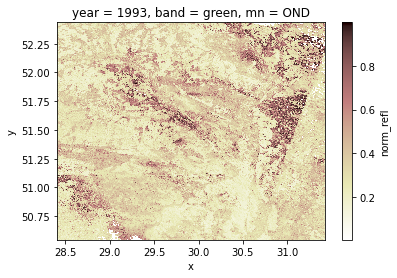

In [7]:
x_da.isel(year=1, mn=3, band=1).plot(cmap="pink_r")

In [8]:
x_da

,Array,Chunk
Bytes,851.98 MB,35.50 MB
Shape,"(681, 1086, 3, 24, 4)","(681, 1086, 3, 1, 4)"
Count,25 Tasks,24 Chunks
Type,float32,numpy.ndarray


In [9]:
y_da

<xarray.DataArray 'esa_cci' (year: 24, y: 681, x: 1086)>
dask.array<open_dataset-fae47f080d9dff4aa9e1ee5aa66bc516esa_cci, shape=(24, 681, 1086), dtype=uint8, chunksize=(1, 681, 1086), chunktype=numpy.ndarray>
Coordinates:
    band     int64 ...
  * y        (y) float64 52.43 52.43 52.43 52.43 ... 50.55 50.55 50.55 50.55
  * x        (x) float64 28.41 28.41 28.41 28.42 ... 31.41 31.42 31.42 31.42
  * year     (year) int64 1992 1993 1994 1995 1996 ... 2011 2012 2013 2014 2015
Attributes:
    transform:      [ 2.77777778e-03  0.00000000e+00  2.84055556e+01  0.00000...
    crs:            +init=epsg:4326
    res:            [0.00277778 0.00277778]
    is_tiled:       0
    nodatavals:     0.0
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area

In [ ]:
x_da.isel(year=2, mn=3).plot(cmap=cm)

In [40]:
cm = copy.copy(plt.get_cmap("pink_r"))
cm.set_bad("gray")

In [94]:
x_tr, y_tr = xgb.return_xy_npa(
            x_da, y_da, year=range(0, 5)
        )

'return_xy_npa'  13.23970 s



In [36]:
x_tr.shape

(3697830, 12)

In [98]:
x_tr

array([[       nan,        nan,        nan, ..., 0.21866667, 0.26766667,
        0.285     ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.23866667, 0.272     ,
        0.2445    ],
       [       nan,        nan,        nan, ..., 0.27483332, 0.28816667,
        0.25583333],
       [       nan,        nan,        nan, ..., 0.199     , 0.23566666,
        0.18666667]], dtype=float32)

In [38]:
y_tr.shape

(3697830,)

In [91]:
xgb.return_xy_npa(x_da.isel(year=range(0, 5)),
                  xgb.y_npa_to_xarray(y_tr, y_da.isel(year=range(0, 5))),
                  year=range(0, 5))

'y_npa_to_xarray'  0.01133 s

'return_xy_npa'  19.08702 s



(array([[       nan,        nan,        nan, ..., 0.21866667, 0.26766667,
         0.285     ],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        ...,
        [       nan,        nan,        nan, ..., 0.23866667, 0.272     ,
         0.2445    ],
        [       nan,        nan,        nan, ..., 0.27483332, 0.28816667,
         0.25583333],
        [       nan,        nan,        nan, ..., 0.199     , 0.23566666,
         0.18666667]], dtype=float32),
 array([  0, 100, 100, ...,  40,  40,   0], dtype=uint8))

'y_npa_to_xarray'  0.01072 s



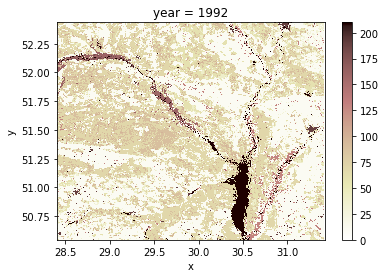

In [96]:
xgb.y_npa_to_xarray(y_tr, y_da.isel(year=range(0, 5))).isel(year=0).plot(cmap=cm)

'x_npa_to_xarray'  0.15835 s



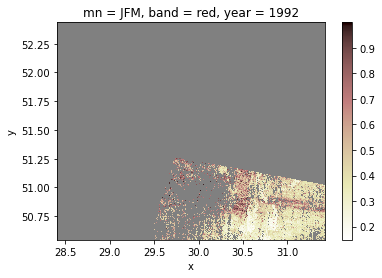

In [105]:
xgb.x_npa_to_xarray(x_tr, x_da.isel(year=range(0, 5))).isel(year=0, mn=0, band=0).plot(cmap=cm)

'x_npa_to_xarray'  0.22868 s



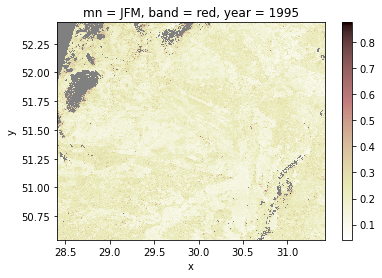

In [106]:
xgb.x_npa_to_xarray(x_tr, x_da.isel(year=range(0, 5))).isel(year=3, mn=0, band=0).plot(cmap=cm)

In [103]:
len(x_da.y.values)

681

Text(0, 0.5, 'count')

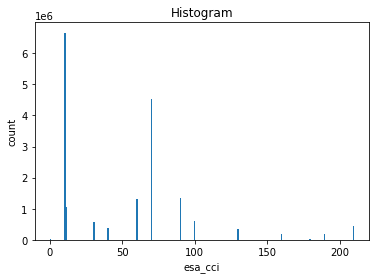

In [17]:
y_da.plot.hist(bins=211)
plt.ylabel('count')

In [107]:
np.unique(y_da.values.ravel())

array([  0,  10,  11,  30,  40,  60,  61,  70,  80,  90, 100, 110, 130,
       150, 160, 180, 190, 200, 201, 210], dtype=uint8)

In [112]:
[i for i in range(len(np.unique(y_da.values.ravel())))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [126]:
def make_esa_map_d():
    a= [0, 10, 11, 30, 40, 60, 61, 70, 80, 90, 100, 
        110, 130, 150, 160, 180, 190, 200, 201, 210]     
    b = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
    forw_d = {}
    rev_d = {}
    for i in range(len(a)):
        forw_d[a[i]] = b[i]
        rev_d[b[i]] = a[i]
    return forw_d, rev_d

FORW_D, REV_D = make_esa_map_d()

def _compress_esa(x):
    return FORW_D[x]

def _decompress_esa(x):
    return REV_D[x]

compress_esa = np.vectorize(_compress_esa)
decompress_esa = np.vectorize(_decompress_esa)


In [129]:
assert(np.all(y_da.values == decompress_esa(compress_esa(y_da.values))))

In [ ]:
def _decompress_esa(x):
    return REV_D[x]

In [119]:
for_d

{0: 0,
 10: 1,
 11: 2,
 30: 3,
 40: 4,
 60: 5,
 61: 6,
 70: 7,
 80: 8,
 90: 9,
 100: 10,
 110: 11,
 130: 12,
 150: 13,
 160: 14,
 180: 15,
 190: 16,
 200: 17,
 201: 18,
 210: 19}

In [120]:
rev_d

{0: 0,
 1: 10,
 2: 11,
 3: 30,
 4: 40,
 5: 60,
 6: 61,
 7: 70,
 8: 80,
 9: 90,
 10: 100,
 11: 110,
 12: 130,
 13: 150,
 14: 160,
 15: 180,
 16: 190,
 17: 200,
 18: 201,
 19: 210}

In [18]:
x_da.plot.hist(bins=100)
cfd = {
    "start_year_i": 0,
    "mid_year_i": 19,
    "end_year_i": 24,
    "take_esa_coords": True,
}
plt.ylabel("Count")

IndentationError: unexpected indent (<ipython-input-18-2d1ab74624c8>, line 2)

In [28]:
x_da

,Array,Chunk
Bytes,851.98 MB,35.50 MB
Shape,"(681, 1086, 3, 24, 4)","(681, 1086, 3, 1, 4)"
Count,25 Tasks,24 Chunks
Type,float32,numpy.ndarray


In [29]:
x_all, y_all = xgb.return_xy_npa(
                x_da, y_da, 
                year=range(cfd["start_year_i"], 
                           cfd["end_year_i"]))

'return_xy_npa'  64.89961 s



In [37]:
x_da.isel(year=0, mn=0, band=1).values.shape

(681, 1086)

In [35]:
 y_da.isel(year=0).values.shape

(681, 1086)

In [ ]:
x_val.shape

In [ ]:
y_val = y_da.isel(year=range(0, 2)) #.values.ravel()
y_val.shape

In [51]:
x_da.isel(year=range(0, 9), mn=0, band=0).shape

(681, 1086, 9)

In [52]:
y_da.isel(year=range(0, 9)).values.shape

(9, 681, 1086)

In [5]:
ls /gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/tmp_nc

chern_JFM_year_1984.nc  hab_JFM_year_1989.nc  hab_JFM_year_2006.nc
chern_JFM_year_1985.nc  hab_JFM_year_1990.nc  hab_JFM_year_2007.nc
chern_JFM_year_1986.nc  hab_JFM_year_1991.nc  hab_JFM_year_2008.nc
chern_JFM_year_1987.nc  hab_JFM_year_1992.nc  hab_JFM_year_2009.nc
chern_JFM_year_1988.nc  hab_JFM_year_1993.nc  hab_JFM_year_2010.nc
chern_JFM_year_1989.nc  hab_JFM_year_1994.nc  hab_JFM_year_2011.nc
chern_JFM_year_1990.nc  hab_JFM_year_1995.nc  hab_JFM_year_2012.nc
chern_JFM_year_1991.nc  hab_JFM_year_1996.nc  hab_JFM_year_2013.nc
chern_JFM_year_1992.nc  hab_JFM_year_1997.nc  hab_JFM_year_2014.nc
chern_JFM_year_1993.nc  hab_JFM_year_1998.nc  hab_JFM_year_2015.nc
chern_JFM_year_1994.nc  hab_JFM_year_1999.nc  hab_JFM_year_2016.nc
chern_JFM_year_1995.nc  hab_JFM_year_2000.nc  hab_JFM_year_2017.nc
hab_JFM_year_1984.nc    hab_JFM_year_2001.nc  hab_JFM_year_2018.nc
hab_JFM_year_1985.nc    hab_JFM_year_2002.nc  hab_JFM_year_2019.nc
hab_JFM_year_1986.nc    hab_JFM_year_2003.nc  hab_JFM_year_202

In [ ]:
xr.open()

In [44]:
da = xr.open_rasterio("/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_AMJ_IR.tif")

In [166]:
import xarray as xr
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt


def plot_band_and_hist(file_name, norm=4000.0, start=0, stop=3):
    fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14, 4))
    image = rasterio.open(file_name)
    image_data = image.read(1)
    da = xr.open_rasterio(file_name)
    (da / norm).isel(band=slice(start, stop)).plot.imshow(ax=axrgb)
    # add colorbar using the now hidden image
    rasterio.plot.show_hist(
        image,
        bins=50,
        histtype="stepfilled",
        lw=0.0,
        stacked=False,
        alpha=0.3,
        ax=axhist,
    )
    # plt.show()

In [158]:
from src.constants import FIGURE_PATH

In [159]:
FIGURE_PATH

PosixPath('/home/users/sithom/gtc-biodiversity/report/figures')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


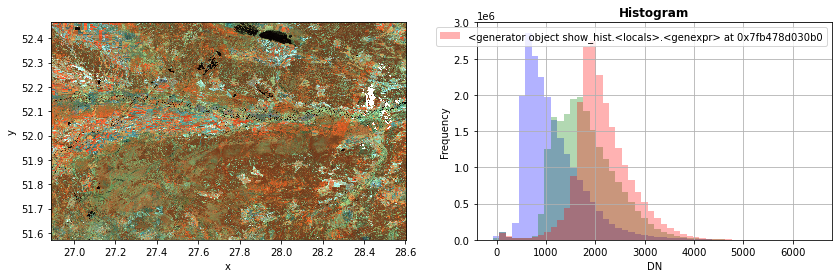

In [167]:
file = "/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_AMJ_IR.tif"
plot_band_and_hist(file)
plt.savefig(FIGURE_PATH / "appendix_chern_map_hist_ir.png", dpi=600)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


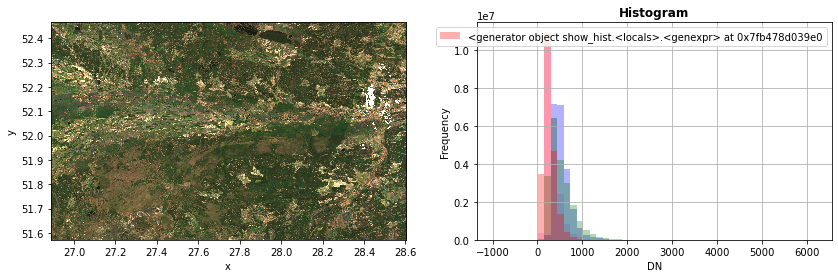

In [168]:
file1 = "/gws/nopw/j04/ai4er/guided-team-challenge/2021/biodiversity/gee_satellite_data/2020/L8_hab_2020_AMJ.tif"
plot_band_and_hist(file1, norm=1500.0, start=1, stop=4)
plt.savefig(FIGURE_PATH / "appendix_chern_map_hist_vis.png", dpi=600)

In [72]:
from src.constants import ESA_LANDCOVER_DIR
ESA_CCI_LEGEND = ESA_LANDCOVER_DIR / "ESACCI-LC-Legend.csv"

In [73]:
print(ESA_CCI_LEGEND)

/neodc/esacci/land_cover/data/land_cover_maps/v2.0.7/ESACCI-LC-Legend.csv


In [74]:
import pandas as pd

In [129]:
# esa to new classes: new class: old classes: R, G, B

_esa_map ="""0 : 0 : 0, 0, 0
            1 : 10, 11, 12, 20, 30, 40                  : 255, 255, 100
            2 : 60, 61, 62, 80, 81, 82, 90, 100         : 0, 160, 0
            3 : 50, 70, 71, 72                          : 0, 100, 0
            4 : 160, 170                                : 0, 120, 90
            5 : 110, 130                                : 190, 150, 0
            6 : 120, 121, 122                           : 150, 100, 0
            7 : 190                                     : 195, 20, 0
            8 : 140, 150, 152, 153, 200, 201, 202, 220  : 255, 220, 210
            9 : 210                                     : 0, 70, 200
            10: 180                                     : 0, 220, 130"""
esa_map = [[[int(z) for z in y.split(",")] for y in x.split(":")] for x in _esa_map.split("\n")]
reduced_list = pd.DataFrame(esa_map).drop(columns=[1]).values.tolist()
tmp_list = [[x[0][0], x[1][0], x[1][1], x[1][2]]  for x in reduced_list]
tmp_list.insert(0, ["NB_LAB", "R", "G", "B"])
df = pd.DataFrame(tmp_list)
new_header = df.iloc[0]
df = df[1:] 
df.columns = new_header
df.set_index("NB_LAB")

,R,G,B
NB_LAB,,,
0,0,0,0
1,255,255,100
2,0,160,0
3,0,100,0
4,0,120,90
5,190,150,0
6,150,100,0
7,195,20,0
8,255,220,210


In [130]:
from src.preprocessing.esa_compress import esa_to_new_classes

In [124]:
df = pd.DataFrame(tmp_list)
new_header = df.iloc[0]
df = df[1:] 
df.columns = new_header
df.set_index("NB_LAB")

,R,G,B
NB_LAB,,,
1,255,255,100
2,0,160,0
3,0,100,0
4,0,120,90
5,190,150,0
6,150,100,0
7,195,20,0
8,255,220,210
9,0,70,200


In [ ]:
df

In [95]:
[[[int(z) for z in y.split(",")] for y in x.split(":")] for x in esa_map.split("\n")]

[[[1], [10, 11, 12, 20, 30, 40], [255, 255, 100]],
 [[2], [60, 61, 62, 80, 81, 82, 90, 100], [0, 160, 0]],
 [[3], [50, 70, 71, 72], [0, 100, 0]],
 [[4], [160, 170], [0, 120, 90]],
 [[5], [110, 130], [190, 150, 0]],
 [[6], [120, 121, 122], [150, 100, 0]],
 [[7], [190], [195, 20, 0]],
 [[8], [140, 150, 152, 153, 200, 201, 202, 220], [255, 220, 210]],
 [[9], [210], [0, 70, 200]],
 [[10], [180], [0, 220, 130]]]

In [76]:
ESA_CCI_CLASSES = pd.read_csv(ESA_CCI_LEGEND, delimiter=";", index_col=0)

In [77]:
ESA_CCI_CLASSES

,LCCOwnLabel,R,G,B
NB_LAB,,,,
0,No data,0,0,0
10,"Cropland, rainfed",255,255,100
11,Herbaceous cover,255,255,100
12,Tree or shrub cover,255,255,0
20,"Cropland, irrigated or post-flooding",170,240,240
30,Mosaic cropland (>50%) / natural vegetation (t...,220,240,100
40,"Mosaic natural vegetation (tree, shrub, herbac...",200,200,100
50,"Tree cover, broadleaved, evergreen, closed to ...",0,100,0
60,"Tree cover, broadleaved, deciduous, closed to ...",0,160,0


In [78]:
def _class_rgb_array_from_df(df: pd.DataFrame) -> np.ndarray:
    """
    Convert class legend to array which holds RGB values for class i at i-th index.

    Note: This is an auxillary function, specificially written for the ESA CCI landcover
     classes. To use this function, adhere to the ESA CCI Legend conventions.

    Args:
        df (pd.DataFrame): dataframe holding the class information and rgb information
            for each class. Must be indexed by the class index. Must contain `R`, `G`,
            `B` columns for the RGB values.

    Returns:
        np.ndarray: A numpy array of RGB values (stored as np.uint8). The value at
            index i corresponds to the RGB value of class i.
    """

    # Initialize empty array with as many entries as the highest class index.
    # Array is will hold rgb value of class i at index i (needed for efficient
    #  looping with numba)
    class_rgb_array = np.empty((df.index.max() + 1, 3), dtype=np.uint8)

    for idx, row in df.iterrows():
        class_rgb_array[idx, ...] = np.array((row.R, row.G, row.B), dtype=np.uint8)

    return class_rgb_array

In [79]:
ESA_CCI_RGB_ARRAY = _class_rgb_array_from_df(ESA_CCI_CLASSES)


In [80]:
ESA_CCI_RGB_ARRAY


array([[  0,   0,   0],
       [ 48, 188, 127],
       [  0,   0,  24],
       [110,  55,  48],
       [188, 127,   0],
       [  0,  32,  70],
       [156, 200, 139],
       [ 85,   0,   0],
       [ 32,  70, 156],
       [200, 139,  85],
       [255, 255, 100],
       [255, 255, 100],
       [255, 255,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [170, 240, 240],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [220, 240, 100],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,  32],
       [ 97, 129, 137],
       [180, 127,   0],
       [  0,  32,  97],
       [129, 137, 180],
       [127,   0,   0],
       [200, 200, 100],
       [  0,   0

In [ ]:
#           new_class: old classes                    : R, G, B

_eunis_map ="""0 : 0                                    : 0, 0, 0
            1 : 21, 22, 23, 24, 29, 30, 31, 33          : 255, 255, 100
            5 : 38, 43                                  : 190, 150, 0
            6 : 35, 36, 37                              : 150, 100, 0
            7 : 25, 26, 27, 28                          : 195, 20, 0
            8 : 1                                       : 255, 220, 210
            9 : 5                                       : 0, 70, 200
            10 : 6                                      : 0, 220, 130
            11 : 7, 8                                   : 0, 0, 0
            12: 9, 11                                   : 0, 0, 0
            13 : 16, 17, 18, 32                         : 0, 0, 0
            14 : 19, 34                                 : 0, 0, 0
            15: 39, 40                                  : 0, 0, 0
            16: 41                                      : 0, 0, 0
            17: 42                                      : 0, 0, 0
            18: 12, 13, 14, 15, 20                      : 0, 0, 0
            19: 10                                      : 0, 0, 0"""

_esa_map ="""0 : 0                                      : 0, 0, 0
            1 : 10, 11, 12, 20, 30, 40                  : 255, 255, 100
            2 : 60, 61, 62, 80, 81, 82, 90, 100         : 0, 160, 0
            3 : 50, 70, 71, 72                          : 0, 100, 0
            4 : 160, 170                                : 0, 120, 90
            5 : 110, 130                                : 190, 150, 0
            6 : 120, 121, 122                           : 150, 100, 0
            7 : 190                                     : 195, 20, 0
            8 : 140, 150, 152, 153, 200, 201, 202, 220  : 255, 220, 210
            9 : 210                                     : 0, 70, 200
            10: 180                                     : 0, 220, 130"""

In [169]:
from src.preprocessing.esa_compress import esa_to_superclasses, eunis_to_superclasses

In [128]:
ESA_SUPER_RGB_ARRAY

array([[216, 103,  55],
       [255, 255, 100],
       [  0, 160,   0],
       [  0, 100,   0],
       [  0, 120,  90],
       [190, 150,   0],
       [150, 100,   0],
       [195,  20,   0],
       [255, 220, 210],
       [  0,  70, 200],
       [  0, 220, 130]], dtype=uint8)

In [134]:
from src.constants import GWS_DATA_DIR
def return_y_da():
    input_filepaths = [
        GWS_DATA_DIR / "esa_cci_rois" / f"esa_cci_{year}_chernobyl.geojson"
        for year in range(1992, 2016)
    ]
    da_list = []
    for i in range(len(input_filepaths)):
        file_name = input_filepaths[i]
        da_list.append(xr.open_rasterio(file_name).isel(band=0))
    return xr.concat(da_list, "year").assign_coords(
        year=("year", list(range(1992, 2016)))
        )

In [135]:
y_da = return_y_da()

In [136]:
y_da

<xarray.DataArray (year: 24, y: 681, x: 1086)>
array([[[  0, 100, 100, ...,  40,  40,   0],
        [  0,  60,  60, ...,  60,  40,   0],
        [  0,  90,  90, ...,  40,  40,   0],
        ...,
        [  0,  10,  10, ...,  60,  60,   0],
        [  0,  10,  70, ...,  40,  40,   0],
        [  0,  70,  70, ...,  40,  40,   0]],

       [[  0, 100, 100, ...,  40,  40,   0],
        [  0,  60,  60, ...,  60,  40,   0],
        [  0,  90,  90, ...,  40,  40,   0],
        ...,
        [  0,  10,  10, ...,  60,  60,   0],
        [  0,  10,  70, ...,  40,  40,   0],
        [  0,  70,  70, ...,  40,  40,   0]],

       [[  0, 100, 100, ...,  40,  40,   0],
        [  0,  60,  60, ...,  60,  40,   0],
        [  0,  90,  90, ...,  40,  40,   0],
        ...,
...
        ...,
        [  0,  10,  10, ...,  60,  60,   0],
        [  0,  10,  70, ...,  60,  60,   0],
        [  0,  70,  70, ...,  60,  60,   0]],

       [[  0, 100, 100, ...,  60,  60,   0],
        [  0,  60,  60, ...,  60, 100,   0],
        [  0,  90,  90, ...,  30,  30,   0],
        ...,
        [  0,  10,  10, ...,  60,  60,   0],
        [  0,  10,  70, ...,  60,  60,   0],
        [  0,  70,  70, ...,  60,  60,   0]],

       [[  0, 100, 100, ...,  60,  60,   0],
        [  0,  60,  60, ...,  60, 100,   0],
        [  0,  90,  90, ...,  30,  30,   0],
        ...,
        [  0,  10,  10, ...,  60,  60,   0],
        [  0,  10,  70, ...,  60,  60,   0],
        [  0,  70,  70, ...,  60,  60,   0]]], dtype=uint8)
Coordinates:
    band     int64 1
  * y        (y) float64 52.43 52.43 52.43 52.43 ... 50.55 50.55 50.55 50.55
  * x        (x) float64 28.41 28.41 28.41 28.42 ... 31.41 31.42 31.42 31.42
  * year     (year) int64 1992 1993 1994 1995 1996 ... 2011 2012 2013 2014 2015
Attributes:
    transform:      (0.002777777777778, 0.0, 28.40555555557222, 0.0, -0.00277...
    crs:            +init=epsg:4326
    res:            (0.002777777777778, 0.002777777777778)
    is_tiled:       0
    nodatavals:     (0.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

In [137]:
from src.preprocessing.esa_compress import esa_to_new_classes


In [138]:
y_new = esa_to_new_classes(y_da)

In [140]:
from src.data_loading.landcover_plot_utils import classes_to_rgb, ESA_SUPER_RGB_ARRAY

In [141]:
new_array = classes_to_rgb(y_new.isel(year=12).values, ESA_SUPER_RGB_ARRAY)

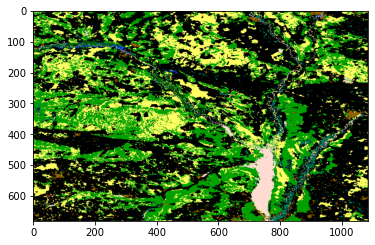

In [142]:
plt.imshow(new_array)